# Meteorite Landings simple analysis
#By- Aarush Kumar
#Dated: Sept. 27,2021

In [1]:
from IPython.display import Image
Image(url='https://c4.wallpaperflare.com/wallpaper/468/1005/275/asteroid-space-3d-planet-wallpaper-preview.jpg')

In [2]:
import numpy as np                       
import pandas as pd                      
import matplotlib.pyplot as plt          
from mpl_toolkits.basemap import Basemap 
import seaborn as sns                    
from ipywidgets import * 
from subprocess import check_output
plt.rcParams['figure.figsize']=(9,7)

In [3]:
data = pd.read_csv('/home/aarush100616/Downloads/Projects/Meteorite Landing Analysis/Data/meteorite-landings.csv')
data = data[(data.reclat != 0.0) & (data.reclong != 0.0)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39278 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         39278 non-null  object 
 1   id           39278 non-null  int64  
 2   nametype     39278 non-null  object 
 3   recclass     39278 non-null  object 
 4   mass         39147 non-null  float64
 5   fall         39278 non-null  object 
 6   year         39018 non-null  float64
 7   reclat       31963 non-null  float64
 8   reclong      31963 non-null  float64
 9   GeoLocation  31963 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.3+ MB


In [4]:
valids = data.groupby('nametype').get_group('Valid').copy()
valids.dropna(inplace=True)
valids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31685 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         31685 non-null  object 
 1   id           31685 non-null  int64  
 2   nametype     31685 non-null  object 
 3   recclass     31685 non-null  object 
 4   mass         31685 non-null  float64
 5   fall         31685 non-null  object 
 6   year         31685 non-null  float64
 7   reclat       31685 non-null  float64
 8   reclong      31685 non-null  float64
 9   GeoLocation  31685 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.7+ MB


In [5]:
data.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            260
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [6]:
data.shape

(39278, 10)

In [7]:
data.size

392780

In [8]:
data.describe()

id          mass          year        reclat       reclong
count  39278.000000  3.914700e+04  39018.000000  31963.000000  31963.000000
mean   23421.640511  1.539495e+04   1989.702317    -47.002666     73.125913
std    15296.162844  6.204445e+05     28.639096     47.051373     83.301272
min        1.000000  0.000000e+00    301.000000    -87.366670   -165.433330
25%    11039.250000  7.200000e+00   1986.000000    -79.683330     26.000000
50%    20977.500000  3.430000e+01   1997.000000    -72.000000     56.872250
75%    33397.750000  2.185300e+02   2003.000000     18.566675    159.392500
max    57455.000000  6.000000e+07   2501.000000     81.166670    354.473330

In [9]:
data.describe().T

count          mean            std        min          25%  \
id       39278.0  23421.640511   15296.162844    1.00000  11039.25000   
mass     39147.0  15394.945303  620444.508788    0.00000      7.20000   
year     39018.0   1989.702317      28.639096  301.00000   1986.00000   
reclat   31963.0    -47.002666      47.051373  -87.36667    -79.68333   
reclong  31963.0     73.125913      83.301272 -165.43333     26.00000   

                 50%           75%           max  
id       20977.50000  33397.750000  5.745500e+04  
mass        34.30000    218.530000  6.000000e+07  
year      1997.00000   2003.000000  2.501000e+03  
reclat     -72.00000     18.566675  8.116667e+01  
reclong     56.87225    159.392500  3.544733e+02

## Geographical Study

Text(0.5, 1.0, 'Map of all valid impacts')

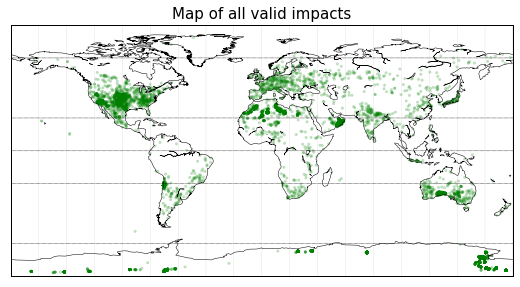

In [10]:
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.5)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6) #plotting equator and tropics and polar circles
x, y = map(valids.reclong,valids.reclat)
map.scatter(x, y, marker='.',alpha=0.25,c='green',edgecolor='None')
plt.title('Map of all valid impacts', fontsize=15)

Text(0.5, 1.0, 'Heatmap of all meteorite impacts')

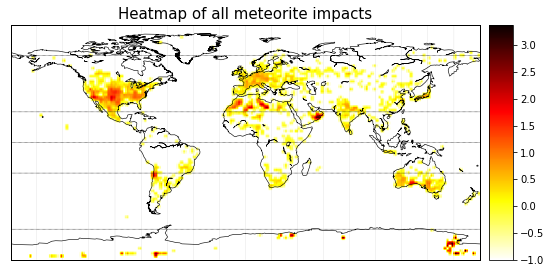

In [11]:
h = plt.hist2d(valids.reclong,valids.reclat,bins=(np.arange(-180,182,2),np.arange(-90,92,2)))
X,Y = np.meshgrid(h[1][:-1]+1.0,h[2][:-1]+1.0)
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)
data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 360, 360, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.colorbar()
plt.title('Heatmap of all meteorite impacts', fontsize=15)

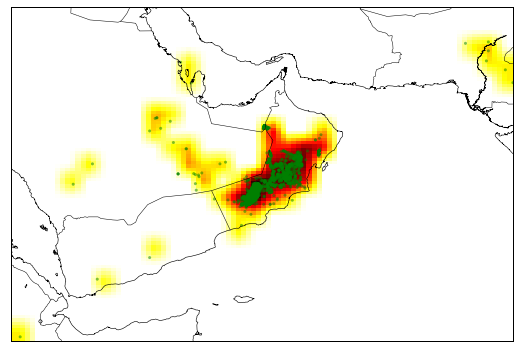

In [12]:
map = Basemap(projection='cyl',llcrnrlat=10.0,urcrnrlat=30.0,llcrnrlon=40.0,urcrnrlon=70.0,resolution='i')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawcountries()
h = plt.hist2d(valids.reclong,valids.reclat,bins=(np.arange(40,71,1.0),np.arange(10,31,1)))
X,Y = np.meshgrid(h[1][:-1]+0.5,h[2][:-1]+0.5)
data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 101, 101, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.scatter(valids.reclong,valids.reclat,marker='.', alpha=0.5, edgecolor='None', color='g')

## Comparing Meteorites found and seen falling

In [13]:
v_fell = valids.groupby('fall').get_group('Fell')
v_found = valids.groupby('fall').get_group('Found')

Text(0.5, 1.0, 'Heatmap of meteorites founds')

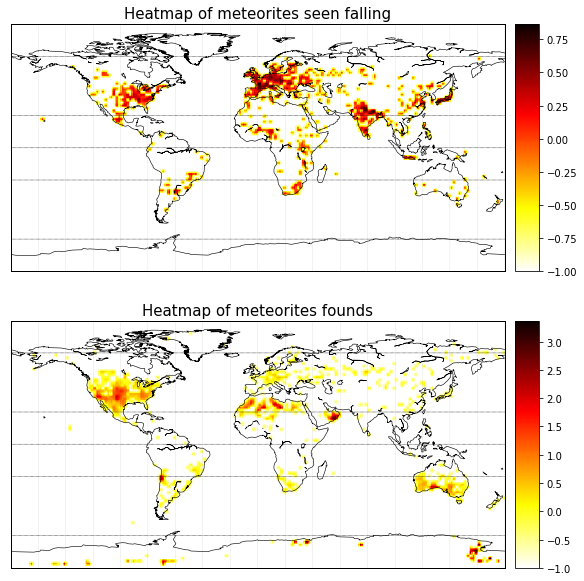

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(211)
h = plt.hist2d(v_fell.reclong,v_fell.reclat,bins=(np.arange(-180,182,2),np.arange(-90,92,2)))
X,Y = np.meshgrid(h[1][:-1]+1.0,h[2][:-1]+1.0)
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)
data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 360, 360, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.colorbar()
plt.title('Heatmap of meteorites seen falling', fontsize=15)
plt.subplot(212)
h = plt.hist2d(v_found.reclong,v_found.reclat,bins=(np.arange(-180,182,2),np.arange(-90,92,2)))
X,Y = np.meshgrid(h[1][:-1]+1.0,h[2][:-1]+1.0)
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)
data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 360, 360, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.colorbar()
plt.title('Heatmap of meteorites founds', fontsize=15)

Text(0.5, 1.0, 'Comparison between meteorites found (magenta) and meteorites seen fallin (black)')

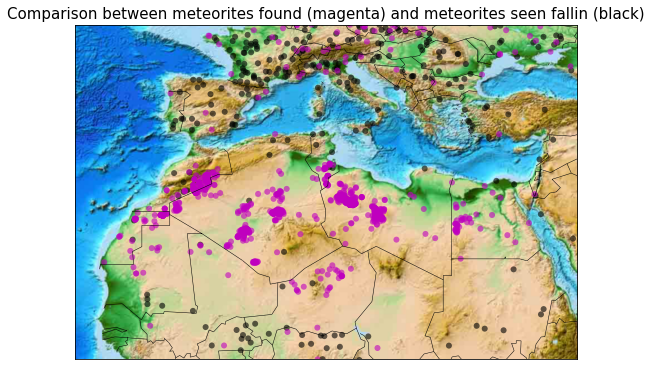

In [15]:
#Another view of the previous statement
map = Basemap(projection='cyl',llcrnrlat=10,llcrnrlon=-20,urcrnrlat=50,urcrnrlon=40,resolution='c')
map.etopo()
map.drawcountries()

map.scatter(v_fell.reclong,v_fell.reclat,edgecolor='none',color='k',alpha=0.6)
map.scatter(v_found.reclong,v_found.reclat,edgecolor='none',color='m',alpha=0.6)

plt.title('Comparison between meteorites found (magenta) and meteorites seen fallin (black)', fontsize=15)

Text(0.5, 1.0, 'Map of all meteorites detected compared to population density')

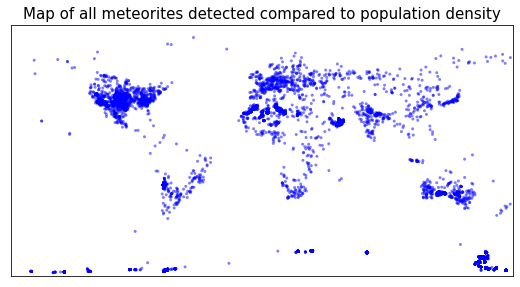

In [16]:
map = Basemap(projection='cyl',resolution='i')
map.scatter(valids.reclong,valids.reclat,marker='.',alpha=0.5,edgecolor='None',color='b')
plt.title('Map of all meteorites detected compared to population density', fontsize=15)

Text(0.5, 1.0, 'Map of meteorites found compared to population density')

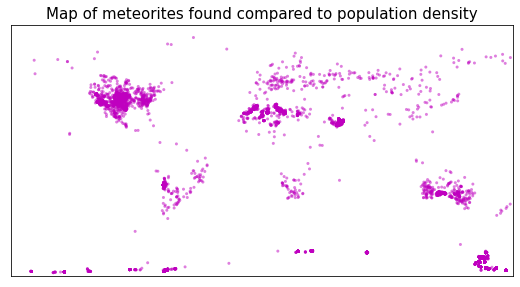

In [17]:
map = Basemap(projection='cyl',resolution='i')
map.scatter(v_found.reclong,v_found.reclat,marker='.',alpha=0.5,edgecolor='None',color='m')
plt.title('Map of meteorites found compared to population density', fontsize=15)

Text(0.5, 1.0, 'Map of meteorites seen falling compared to population density')

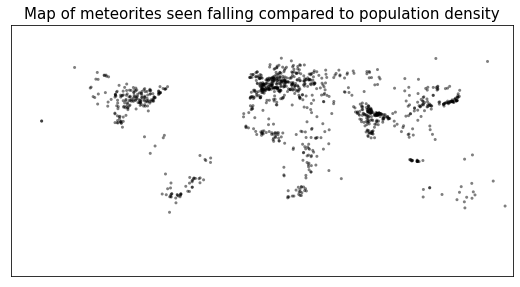

In [18]:
map = Basemap(projection='cyl',resolution='i')
map.scatter(v_fell.reclong,v_fell.reclat,marker='.',alpha=0.5,edgecolor='None',color='k')
plt.title('Map of meteorites seen falling compared to population density', fontsize=15)

In [19]:
def fscat(x):
    plt.figure(figsize=(10,8))
    map = Basemap(projection='cyl',resolution='c')
    map.drawmapboundary(fill_color='w')
    map.drawcoastlines(linewidth=0.5)
    map.scatter(v_fell.reclong[v_fell.year==x],v_fell.reclat[v_fell.year==x],
                color='k',alpha=0.7)
    map.scatter(v_found.reclong[v_found.year==x],v_found.reclat[v_found.year==x],
                color='m',alpha=0.7)
    return 

wid = IntSlider(min=1900,max=2013,step=1,description='Year',layout=Layout(width='75%'))
_ = interact(fscat,x=wid)

interactive(children=(IntSlider(value=1900, description='Year', layout=Layout(width='75%'), max=2013, min=1900…

## mass distribution

Text(0.5, 1.0, 'Location of all meteorites with their mass')

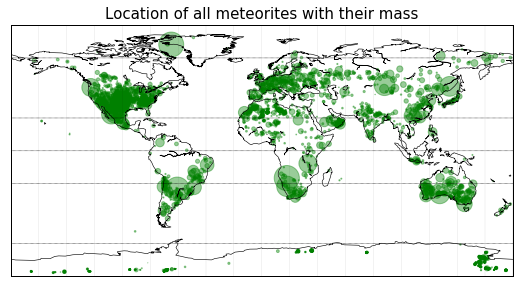

In [20]:
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)
map.scatter(valids.reclong,valids.reclat,s=np.sqrt(valids.mass/150),alpha=0.4,color='g')
plt.title('Location of all meteorites with their mass', fontsize=15)

Text(0.5, 1.0, 'Location and mass of meteorites found')

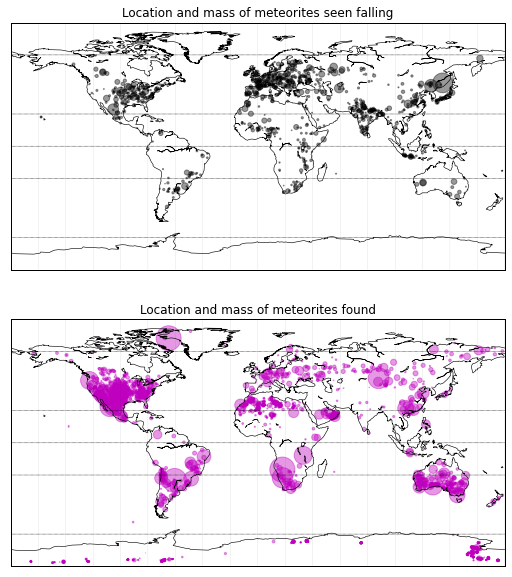

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(211)
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)
map.scatter(v_fell.reclong,v_fell.reclat,s=np.sqrt(v_fell.mass/150),
            alpha=0.4,color='k')
plt.title('Location and mass of meteorites seen falling')
plt.subplot(212)
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)

map.scatter(v_found.reclong,v_found.reclat,s=np.sqrt(v_found.mass/150),
            alpha=0.4,color='m')
plt.title('Location and mass of meteorites found')

/home/aarush100616/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aarush100616/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


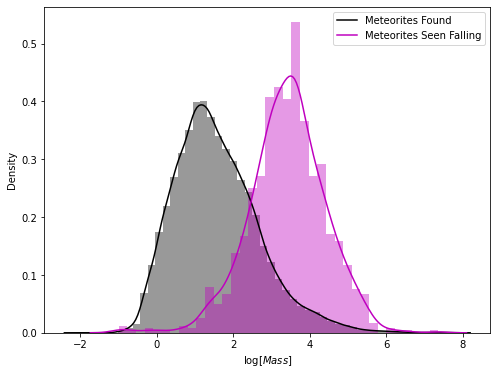

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(np.log10(v_found.mass),color='k')
sns.distplot(np.log10(v_fell.mass),color='m',axlabel='$\log[Mass]$')
plt.legend(['Meteorites Found','Meteorites Seen Falling'])

## Historical Analysis

(1900.0, 2014.0)

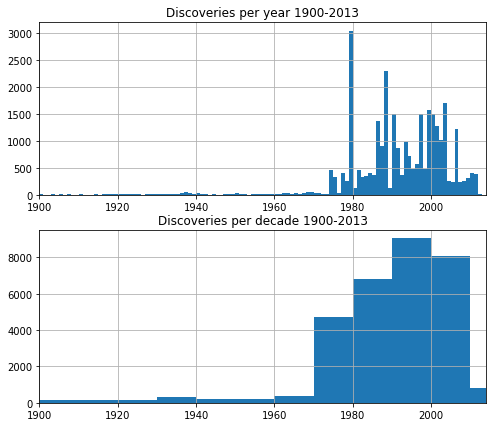

In [23]:
plt.subplot(211)
valids.year.hist(bins=np.arange(1900,2014,1),figsize=(8,7))
plt.title('Discoveries per year 1900-2013')
plt.xlim(1900,2014)
plt.subplot(212)
valids.year.hist(bins=np.arange(1900,2023,10),figsize=(8,7))
plt.title('Discoveries per decade 1900-2013')
plt.xlim(1900,2014)

(1900.0, 2014.0)

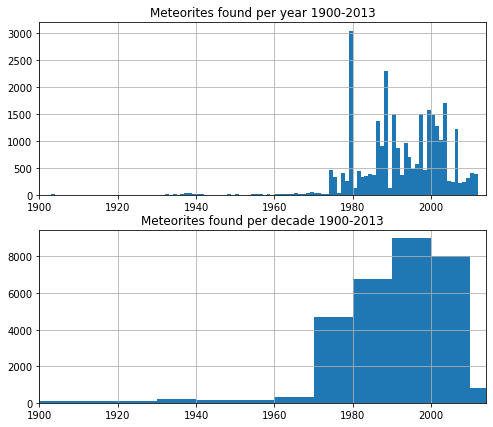

In [24]:
# Againg it is interesting to separate "seen" and "found"
plt.subplot(211)
v_found.year.hist(bins=np.arange(1900,2014,1),figsize=(8,7))
plt.title('Meteorites found per year 1900-2013')
plt.xlim(1900,2014)
plt.subplot(212)
v_found.year.hist(bins=np.arange(1900,2023,10),figsize=(8,7))
plt.title('Meteorites found per decade 1900-2013')
plt.xlim(1900,2014)

(1900.0, 2014.0)

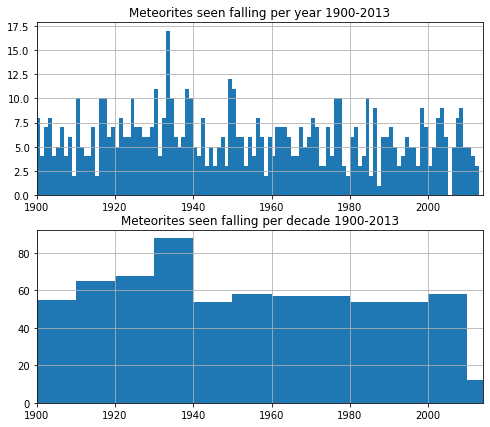

In [25]:
plt.subplot(211)
v_fell.year.hist(bins=np.arange(1900,2014,1),figsize=(8,7))
plt.title('Meteorites seen falling per year 1900-2013')
plt.xlim(1900,2014)
plt.subplot(212)
v_fell.year.hist(bins=np.arange(1900,2023,10),figsize=(8,7))
plt.title('Meteorites seen falling per decade 1900-2013')
plt.xlim(1900,2014)

Text(0.5, 1.0, 'Meteorite recorded latitude vs year')

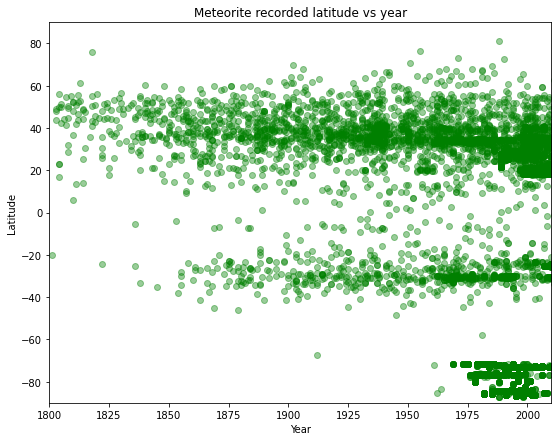

In [26]:
plt.scatter(valids.year,valids.reclat,color='g',alpha=0.4)
plt.xlim(1800,2010)
plt.ylim(-90,90)
plt.ylabel('Latitude')
plt.xlabel('Year')
plt.title('Meteorite recorded latitude vs year')

## Class analysis

In [28]:
v_class = valids['recclass'].value_counts()
v_class

L6             6523
H5             5549
H4             3320
H6             3051
L5             2723
               ... 
H5-7              1
L(LL)6            1
C5/6-ung          1
L/LL3.6/3.7       1
L3.3-3.5          1
Name: recclass, Length: 388, dtype: int64

In [29]:
len(v_class)

388

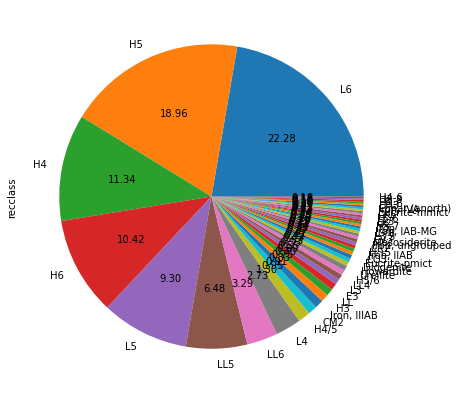

In [30]:
v_class[v_class > 50.0].plot.pie(autopct='%.2f')

In [31]:
tmp_df1 = valids.copy()

In [32]:
tmp_df1.recclass.replace(to_replace=['Acapulcoite', 'Acapulcoite/Lodranite', 'Acapulcoite/lodranite',
           'Lodranite','Lodranite-an','Winonaite','Achondrite-prim'],value='Achondrite_prim',inplace=True)

tmp_df1.recclass.replace(to_replace=['Angrite', 'Aubrite','Aubrite-an','Ureilite', 'Ureilite-an','Ureilite-pmict',
           'Brachinite','Diogenite', 'Diogenite-an', 'Diogenite-olivine', 'Diogenite-pm',
           'Eucrite', 'Eucrite-Mg rich', 'Eucrite-an', 'Eucrite-br','Eucrite-cm',
           'Eucrite-mmict', 'Eucrite-pmict', 'Eucrite-unbr','Howardite'],value='Achondrite_aste',inplace=True)

tmp_df1.recclass.replace(to_replace=['Lunar', 'Lunar (anorth)', 'Lunar (bas. breccia)',
           'Lunar (bas/anor)', 'Lunar (bas/gab brec)', 'Lunar (basalt)',
           'Lunar (feldsp. breccia)', 'Lunar (gabbro)', 'Lunar (norite)'],value='Lunar',inplace=True)

tmp_df1.recclass.replace(to_replace=['Martian', 'Martian (OPX)','Martian (chassignite)', 'Martian (nakhlite)',
           'Martian (shergottite)'],value='Martian',inplace=True)

tmp_df1.recclass.replace(to_replace=['C','C2','C4','C4/5','C6','C1-ung', 'C1/2-ung','C2-ung',
           'C3-ung', 'C3/4-ung','C4-ung','C5/6-ung',
           'CB', 'CBa', 'CBb', 'CH/CBb', 'CH3', 'CH3 ', 'CI1', 'CK', 'CK3',
           'CK3-an', 'CK3.8', 'CK3/4', 'CK4', 'CK4-an', 'CK4/5', 'CK5',
           'CK5/6', 'CK6', 'CM', 'CM-an', 'CM1', 'CM1/2', 'CM2', 'CM2-an',
           'CO3', 'CO3 ', 'CO3.0', 'CO3.1', 'CO3.2', 'CO3.3', 'CO3.4', 'CO3.5',
           'CO3.6', 'CO3.7', 'CO3.8', 'CR', 'CR-an', 'CR1', 'CR2', 'CR2-an',
           'CV2', 'CV3', 'CV3-an'],value='Chondrite_carbon',inplace=True)

tmp_df1.recclass.replace(to_replace=['OC', 'OC3','H', 'H(5?)', 'H(?)4', 'H(L)3', 'H(L)3-an', 'H-an','H-imp melt',
           'H-melt rock', 'H-metal', 'H/L3', 'H/L3-4', 'H/L3.5',
           'H/L3.6', 'H/L3.7', 'H/L3.9', 'H/L4', 'H/L4-5', 'H/L4/5', 'H/L5',
           'H/L6', 'H/L6-melt rock', 'H/L~4', 'H3', 'H3 ', 'H3-4', 'H3-5',
           'H3-6', 'H3-an', 'H3.0', 'H3.0-3.4', 'H3.1', 'H3.10', 'H3.2',
           'H3.2-3.7', 'H3.2-6', 'H3.2-an', 'H3.3', 'H3.4', 'H3.4-5',
           'H3.4/3.5', 'H3.5', 'H3.5-4', 'H3.6', 'H3.6-6', 'H3.7', 'H3.7-5',
           'H3.7-6', 'H3.7/3.8', 'H3.8', 'H3.8-4', 'H3.8-5', 'H3.8-6',
           'H3.8-an', 'H3.8/3.9', 'H3.8/4', 'H3.9', 'H3.9-5', 'H3.9-6',
           'H3.9/4', 'H3/4', 'H4', 'H4 ', 'H4(?)', 'H4-5', 'H4-6', 'H4-an',
           'H4/5', 'H4/6', 'H5', 'H5 ', 'H5-6', 'H5-7', 'H5-an',
           'H5-melt breccia', 'H5/6', 'H6', 'H6 ', 'H6-melt breccia', 'H6/7',
           'H7', 'H?','H~4', 'H~4/5', 'H~5', 'H~6','L', 'L(?)3',
           'L(H)3', 'L(LL)3', 'L(LL)3.05', 'L(LL)3.5-3.7', 'L(LL)5', 'L(LL)6',
           'L(LL)~4', 'L-imp melt', 'L-melt breccia', 'L-melt rock', 'L-metal',
           'L/LL', 'L/LL(?)3', 'L/LL-melt rock', 'L/LL3', 'L/LL3-5', 'L/LL3-6',
           'L/LL3.10', 'L/LL3.2', 'L/LL3.4', 'L/LL3.5', 'L/LL3.6/3.7', 'L/LL4',
           'L/LL4-6', 'L/LL4/5', 'L/LL5', 'L/LL5-6', 'L/LL5/6', 'L/LL6',
           'L/LL6-an', 'L/LL~4', 'L/LL~5', 'L/LL~6', 'L3', 'L3-4', 'L3-5',
           'L3-6', 'L3-7', 'L3.0', 'L3.0-3.7', 'L3.0-3.9', 'L3.05', 'L3.1',
           'L3.10', 'L3.2', 'L3.2-3.5', 'L3.2-3.6', 'L3.3', 'L3.3-3.5',
           'L3.3-3.6', 'L3.3-3.7', 'L3.4', 'L3.4-3.7', 'L3.5', 'L3.5-3.7',
           'L3.5-3.8', 'L3.5-3.9', 'L3.5-5', 'L3.6', 'L3.6-4', 'L3.7',
           'L3.7-3.9', 'L3.7-4', 'L3.7-6', 'L3.7/3.8', 'L3.8', 'L3.8-5',
           'L3.8-6', 'L3.8-an', 'L3.9', 'L3.9-5', 'L3.9-6', 'L3.9/4', 'L3/4',
           'L4', 'L4 ', 'L4-5', 'L4-6', 'L4-an', 'L4-melt rock', 'L4/5', 'L5',
           'L5 ', 'L5-6', 'L5-7', 'L5/6', 'L6', 'L6 ', 'L6-melt breccia',
           'L6-melt rock', 'L6/7', 'L7', 'LL', 'LL(L)3', 'LL-melt rock', 'LL3',
           'LL3-4', 'LL3-5', 'LL3-6', 'LL3.0', 'LL3.00', 'LL3.1', 'LL3.1-3.5',
           'LL3.10', 'LL3.15', 'LL3.2', 'LL3.3', 'LL3.4', 'LL3.5', 'LL3.6',
           'LL3.7', 'LL3.7-6', 'LL3.8', 'LL3.8-6', 'LL3.9', 'LL3.9/4', 'LL3/4',
           'LL4', 'LL4-5', 'LL4-6', 'LL4/5', 'LL4/6', 'LL5', 'LL5-6', 'LL5-7',
           'LL5/6', 'LL6', 'LL6 ', 'LL6(?)', 'LL6/7', 'LL7', 'LL7(?)',
           'LL<3.5', 'LL~3', 'LL~4', 'LL~4/5', 'LL~5', 'LL~6',
           'L~3', 'L~4', 'L~5', 'L~6','Relict H','Relict OC'],value='Chondrite_ordin',inplace=True)

tmp_df1.recclass.replace(to_replace=['EH','EH-imp melt', 'EH3', 'EH3/4-an', 'EH4', 'EH4/5', 'EH5', 'EH6',
           'EH6-an', 'EH7', 'EH7-an', 'EL3', 'EL3/4', 'EL4', 'EL4/5', 'EL5',
           'EL6', 'EL6 ', 'EL6/7', 'EL7','E','E3','E4', 'E5','E6'],value='Chondrite_enst',inplace=True)

tmp_df1.recclass.replace(to_replace=['K', 'K3','R', 'R3', 'R3-4', 'R3-5', 'R3-6', 'R3.4', 'R3.5-6',
           'R3.6', 'R3.7', 'R3.8', 'R3.8-5', 'R3.8-6', 'R3.9', 'R3/4', 'R4',
           'R4/5', 'R5', 'R6'],value='Chondrite_other',inplace=True)

tmp_df1.recclass.replace(to_replace=['Pallasite', 'Pallasite, PES','Pallasite, PMG',
           'Pallasite, PMG-an', 'Pallasite, ungrouped',
           'Pallasite?'],value='Pallasite',inplace=True)

tmp_df1.recclass.replace(to_replace=['Mesosiderite', 'Mesosiderite-A','Mesosiderite-A1',
           'Mesosiderite-A2', 'Mesosiderite-A3','Mesosiderite-A3/4',
           'Mesosiderite-A4', 'Mesosiderite-B','Mesosiderite-B1',
           'Mesosiderite-B2', 'Mesosiderite-B4','Mesosiderite-C',
           'Mesosiderite-C2', 'Mesosiderite-an','Mesosiderite?'],value='Mesosiderite',inplace=True)

tmp_df1.recclass.replace(to_replace=['Iron, IC', 'Iron, IC-an', 'Iron, IIAB', 'Iron, IIAB-an',
           'Iron, IIC', 'Iron, IID', 'Iron, IID-an','Iron, IIF', 'Iron, IIG',
           'Iron, IIIAB', 'Iron, IIIAB-an', 'Iron, IIIAB?', 'Iron, IIIE',
           'Iron, IIIE-an', 'Iron, IIIF', 'Iron, IVA', 'Iron, IVA-an',
           'Iron, IVB'],value='Magmatic',inplace=True)

tmp_df1.recclass.replace(to_replace=['Iron, IAB complex', 'Iron, IAB-MG','Iron, IAB-an', 'Iron, IAB-sHH',
           'Iron, IAB-sHL', 'Iron, IAB-sLH','Iron, IAB-sLL', 'Iron, IAB-sLM',
           'Iron, IAB-ung', 'Iron, IAB?','Iron, IIE',
           'Iron, IIE-an', 'Iron, IIE?'],value='Non_magmatic',inplace=True)

tmp_df1.recclass.replace(to_replace=['Iron','Iron?','Relict iron','Chondrite-fusion crust',
           'Fusion crust','Impact melt breccia',
           'Enst achon-ung','Iron, ungrouped','Stone-uncl', 'Stone-ung',
           'Unknown','Achondrite-ung','Chondrite-ung',
           'Enst achon','E-an',  'E3-an',  'E5-an'],value='Unknown-Ungrouped',inplace=True)

In [33]:
tmp_df1['recclass'].value_counts()

Chondrite_ordin      28230
Achondrite_aste        828
Chondrite_carbon       825
Magmatic               532
Chondrite_enst         385
Unknown-Ungrouped      232
Non_magmatic           228
Mesosiderite           121
Lunar                  100
Pallasite               64
Achondrite_prim         58
Martian                 44
Chondrite_other         38
Name: recclass, dtype: int64

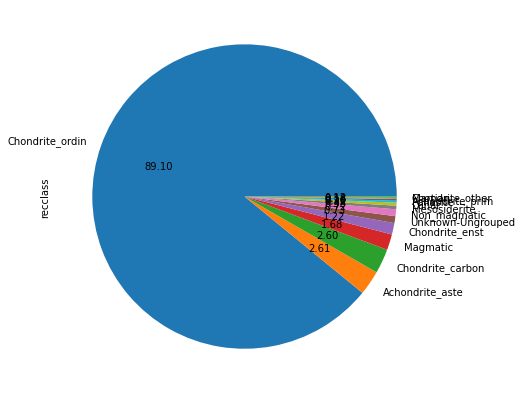

In [34]:
tmp_df1['recclass'].value_counts().plot.pie(autopct='%.2f')

In [35]:
tmp_df2 = valids.copy()

In [36]:
tmp_df2.recclass.replace(to_replace=['Acapulcoite', 'Acapulcoite/Lodranite', 'Acapulcoite/lodranite',
           'Lodranite','Lodranite-an','Winonaite','Achondrite-prim','Angrite',
           'Aubrite','Aubrite-an','Ureilite', 'Ureilite-an','Ureilite-pmict',
           'Brachinite','Diogenite', 'Diogenite-an', 'Diogenite-olivine', 'Diogenite-pm',
           'Eucrite', 'Eucrite-Mg rich', 'Eucrite-an', 'Eucrite-br','Eucrite-cm',
           'Eucrite-mmict', 'Eucrite-pmict', 'Eucrite-unbr','Howardite',
           'Lunar', 'Lunar (anorth)', 'Lunar (bas. breccia)',
           'Lunar (bas/anor)', 'Lunar (bas/gab brec)', 'Lunar (basalt)',
           'Lunar (feldsp. breccia)', 'Lunar (gabbro)', 'Lunar (norite)',
           'Martian', 'Martian (OPX)','Martian (chassignite)', 'Martian (nakhlite)',
           'Martian (shergottite)','C','C2','C4','C4/5','C6','C1-ung', 'C1/2-ung','C2-ung',
           'C3-ung', 'C3/4-ung','C4-ung','C5/6-ung', 'CB', 'CBa', 'CBb', 'CH/CBb',
           'CH3', 'CH3 ', 'CI1', 'CK', 'CK3','CK3-an', 'CK3.8', 'CK3/4', 'CK4', 'CK4-an', 'CK4/5', 'CK5',
           'CK5/6', 'CK6', 'CM', 'CM-an', 'CM1', 'CM1/2', 'CM2', 'CM2-an',
           'CO3', 'CO3 ', 'CO3.0', 'CO3.1', 'CO3.2', 'CO3.3', 'CO3.4', 'CO3.5',
           'CO3.6', 'CO3.7', 'CO3.8', 'CR', 'CR-an', 'CR1', 'CR2', 'CR2-an',
           'CV2', 'CV3', 'CV3-an', 'OC', 'OC3','Relict H','Relict OC',
           'EH','EH-imp melt', 'EH3', 'EH3/4-an', 'EH4', 'EH4/5', 'EH5', 'EH6',
           'EH6-an', 'EH7', 'EH7-an', 'EL3', 'EL3/4', 'EL4', 'EL4/5', 'EL5',
           'EL6', 'EL6 ', 'EL6/7', 'EL7','E','E3','E4', 'E5','E6',
           'K', 'K3','R', 'R3', 'R3-4', 'R3-5', 'R3-6', 'R3.4', 'R3.5-6',
           'R3.6', 'R3.7', 'R3.8', 'R3.8-5', 'R3.8-6', 'R3.9', 'R3/4', 'R4',
           'R4/5', 'R5', 'R6','Pallasite', 'Pallasite, PES','Pallasite, PMG',
           'Pallasite, PMG-an', 'Pallasite, ungrouped',
           'Pallasite?','Mesosiderite', 'Mesosiderite-A','Mesosiderite-A1',
           'Mesosiderite-A2', 'Mesosiderite-A3','Mesosiderite-A3/4',
           'Mesosiderite-A4', 'Mesosiderite-B','Mesosiderite-B1',
           'Mesosiderite-B2', 'Mesosiderite-B4','Mesosiderite-C',
           'Mesosiderite-C2', 'Mesosiderite-an','Mesosiderite?',
           'Iron, IC', 'Iron, IC-an', 'Iron, IIAB', 'Iron, IIAB-an',
           'Iron, IIC', 'Iron, IID', 'Iron, IID-an','Iron, IIF', 'Iron, IIG',
           'Iron, IIIAB', 'Iron, IIIAB-an', 'Iron, IIIAB?', 'Iron, IIIE',
           'Iron, IIIE-an', 'Iron, IIIF', 'Iron, IVA', 'Iron, IVA-an',
           'Iron, IVB','Iron, IAB complex', 'Iron, IAB-MG','Iron, IAB-an', 'Iron, IAB-sHH',
           'Iron, IAB-sHL', 'Iron, IAB-sLH','Iron, IAB-sLL', 'Iron, IAB-sLM',
           'Iron, IAB-ung', 'Iron, IAB?','Iron, IIE',
           'Iron, IIE-an', 'Iron, IIE?','Iron','Iron?','Relict iron','Chondrite-fusion crust',
           'Fusion crust','Impact melt breccia',
           'Enst achon-ung','Iron, ungrouped','Stone-uncl', 'Stone-ung',
           'Unknown','Achondrite-ung','Chondrite-ung',
           'Enst achon','E-an',  'E3-an',  'E5-an'],value='Others',inplace=True)

tmp_df2.recclass.replace(to_replace=['H', 'H(5?)', 'H(?)4', 'H(L)3', 'H(L)3-an', 'H-an','H-imp melt',
           'H-melt rock', 'H-metal', 'H/L3', 'H/L3-4', 'H/L3.5',
           'H/L3.6', 'H/L3.7', 'H/L3.9', 'H/L4', 'H/L4-5', 'H/L4/5', 'H/L5',
           'H/L6', 'H/L6-melt rock', 'H/L~4', 'H3', 'H3 ', 'H3-4', 'H3-5',
           'H3-6', 'H3-an', 'H3.0', 'H3.0-3.4', 'H3.1', 'H3.10', 'H3.2',
           'H3.2-3.7', 'H3.2-6', 'H3.2-an', 'H3.3', 'H3.4', 'H3.4-5',
           'H3.4/3.5', 'H3.5', 'H3.5-4', 'H3.6', 'H3.6-6', 'H3.7', 'H3.7-5',
           'H3.7-6', 'H3.7/3.8', 'H3.8', 'H3.8-4', 'H3.8-5', 'H3.8-6',
           'H3.8-an', 'H3.8/3.9', 'H3.8/4', 'H3.9', 'H3.9-5', 'H3.9-6',
           'H3.9/4', 'H3/4', 'H4', 'H4 ', 'H4(?)', 'H4-5', 'H4-6', 'H4-an',
           'H4/5', 'H4/6', 'H5', 'H5 ', 'H5-6', 'H5-7', 'H5-an',
           'H5-melt breccia', 'H5/6', 'H6', 'H6 ', 'H6-melt breccia', 'H6/7',
           'H7', 'H?','H~4', 'H~4/5', 'H~5', 'H~6'],value='H',inplace=True)

tmp_df2.recclass.replace(to_replace=['L', 'L(?)3','L(H)3', 'L(LL)3', 'L(LL)3.05', 'L(LL)3.5-3.7', 'L(LL)5', 'L(LL)6',
           'L(LL)~4', 'L-imp melt', 'L-melt breccia', 'L-melt rock', 'L-metal',
           'L/LL', 'L/LL(?)3', 'L/LL-melt rock', 'L/LL3', 'L/LL3-5', 'L/LL3-6',
           'L/LL3.10', 'L/LL3.2', 'L/LL3.4', 'L/LL3.5', 'L/LL3.6/3.7', 'L/LL4',
           'L/LL4-6', 'L/LL4/5', 'L/LL5', 'L/LL5-6', 'L/LL5/6', 'L/LL6',
           'L/LL6-an', 'L/LL~4', 'L/LL~5', 'L/LL~6', 'L3', 'L3-4', 'L3-5',
           'L3-6', 'L3-7', 'L3.0', 'L3.0-3.7', 'L3.0-3.9', 'L3.05', 'L3.1',
           'L3.10', 'L3.2', 'L3.2-3.5', 'L3.2-3.6', 'L3.3', 'L3.3-3.5',
           'L3.3-3.6', 'L3.3-3.7', 'L3.4', 'L3.4-3.7', 'L3.5', 'L3.5-3.7',
           'L3.5-3.8', 'L3.5-3.9', 'L3.5-5', 'L3.6', 'L3.6-4', 'L3.7',
           'L3.7-3.9', 'L3.7-4', 'L3.7-6', 'L3.7/3.8', 'L3.8', 'L3.8-5',
           'L3.8-6', 'L3.8-an', 'L3.9', 'L3.9-5', 'L3.9-6', 'L3.9/4', 'L3/4',
           'L4', 'L4 ', 'L4-5', 'L4-6', 'L4-an', 'L4-melt rock', 'L4/5', 'L5',
           'L5 ', 'L5-6', 'L5-7', 'L5/6', 'L6', 'L6 ', 'L6-melt breccia',
           'L6-melt rock', 'L6/7', 'L7','L~3', 'L~4', 'L~5', 'L~6'],value='L',inplace=True)

tmp_df2.recclass.replace(to_replace=['LL', 'LL(L)3', 'LL-melt rock', 'LL3',
           'LL3-4', 'LL3-5', 'LL3-6', 'LL3.0', 'LL3.00', 'LL3.1', 'LL3.1-3.5',
           'LL3.10', 'LL3.15', 'LL3.2', 'LL3.3', 'LL3.4', 'LL3.5', 'LL3.6',
           'LL3.7', 'LL3.7-6', 'LL3.8', 'LL3.8-6', 'LL3.9', 'LL3.9/4', 'LL3/4',
           'LL4', 'LL4-5', 'LL4-6', 'LL4/5', 'LL4/6', 'LL5', 'LL5-6', 'LL5-7',
           'LL5/6', 'LL6', 'LL6 ', 'LL6(?)', 'LL6/7', 'LL7', 'LL7(?)',
           'LL<3.5', 'LL~3', 'LL~4', 'LL~4/5', 'LL~5', 'LL~6'],value='LL',inplace=True)

In [37]:
tmp_df2['recclass'].value_counts()

H         13537
L         11085
LL         3539
Others     3524
Name: recclass, dtype: int64

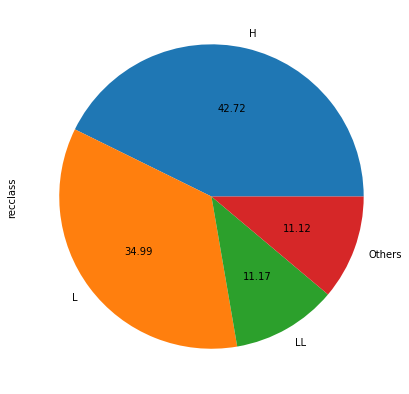

In [38]:
tmp_df2['recclass'].value_counts().plot.pie(autopct='%.2f')

In [39]:
Hs = tmp_df2[tmp_df2.recclass=='H']
Ls = tmp_df2[tmp_df2.recclass=='L']
LLs = tmp_df2[tmp_df2.recclass=='LL']
Oth = tmp_df2[tmp_df2.recclass=='Others']

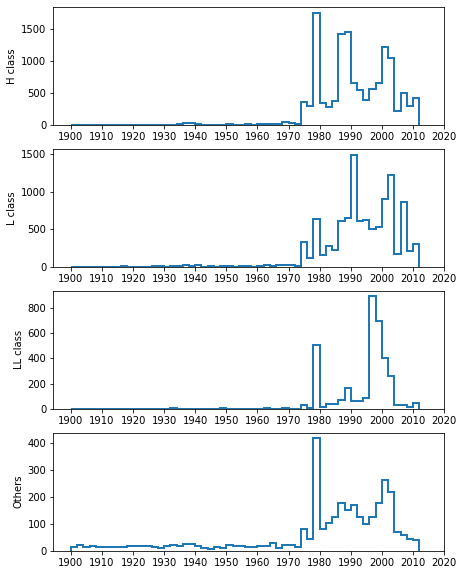

In [40]:
plt.figure(figsize=(7,10))

plt.subplot(411)
_=plt.hist(Hs.year.values,bins=np.arange(1900,2014,2),lw=2,histtype='step')
plt.ylabel('H class')
_=plt.xticks(np.arange(1900,2030,10))

plt.subplot(412)
_=plt.hist(Ls.year.values,bins=np.arange(1900,2014,2),lw=2,histtype='step')
plt.ylabel('L class')
_=plt.xticks(np.arange(1900,2030,10))

plt.subplot(413)
_=plt.hist(LLs.year.values,bins=np.arange(1900,2014,2),lw=2,histtype='step')
plt.ylabel('LL class')
_=plt.xticks(np.arange(1900,2030,10))

plt.subplot(414)
_=plt.hist(Oth.year.values,bins=np.arange(1900,2014,2),lw=2,histtype='step')
plt.ylabel('Others')
_=plt.xticks(np.arange(1900,2030,10))